In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Loading split data...
Split data loaded successfully!


In [6]:
def build_inceptionV3(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.applications.inception_v3.InceptionV3(
                weights="imagenet",
                include_top=False,
                input_shape=preprocessing_utils.images.shape[1:],
            ),
            keras.layers.GlobalAveragePooling2D(),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(
                preprocessing_utils.num_classes,
                kernel_regularizer=keras.regularizers.l2(0.01),
                activation="softmax",
            ),
        ],
    )

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    model.summary()

    return model

In [7]:
inceptionV3_wrapper = ModelWrapper("InceptionV3", preprocessing_utils=preprocessing_utils)

In [8]:
inceptionV3_wrapper.build_model(build_fn=build_inceptionV3, model_name=inceptionV3_wrapper.model_name)

Building model...
Model: "InceptionV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 22,068,281
Trainable params: 22,033,849
Non-trainable params: 34,432
____________________

In [9]:
inceptionV3_wrapper.train_and_save_model_and_history(batch_size=32)

Epoch 1/100
129/129 [==============================] - ETA: 0s - loss: 3.6536 - accuracy: 0.0754
Epoch 1: val_loss improved from inf to 3.51053, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 44s 300ms/step - loss: 3.6536 - accuracy: 0.0754 - val_loss: 3.5105 - val_accuracy: 0.0922 - lr: 1.0000e-04
Epoch 2/100
129/129 [==============================] - ETA: 0s - loss: 3.4453 - accuracy: 0.1438
Epoch 2: val_loss improved from 3.51053 to 3.38957, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 297ms/step - loss: 3.4453 - accuracy: 0.1438 - val_loss: 3.3896 - val_accuracy: 0.1567 - lr: 1.0000e-04
Epoch 3/100
129/129 [==============================] - ETA: 0s - loss: 3.2915 - accuracy: 0.1978
Epoch 3: val_loss improved from 3.38957 to 3.29341, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 3.2915 - accuracy: 0.1978 - val_loss: 3.2934 - val_accuracy: 0.1843 - lr: 1.0000e-04
Epoch 4/100
129/129 [==============================] - ETA: 0s - loss: 3.1361 - accuracy: 0.2377
Epoch 4: val_loss improved from 3.29341 to 3.18419, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 3.1361 - accuracy: 0.2377 - val_loss: 3.1842 - val_accuracy: 0.1982 - lr: 1.0000e-04
Epoch 5/100
129/129 [==============================] - ETA: 0s - loss: 2.9726 - accuracy: 0.2990
Epoch 5: val_loss improved from 3.18419 to 3.05716, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 288ms/step - loss: 2.9726 - accuracy: 0.2990 - val_loss: 3.0572 - val_accuracy: 0.2535 - lr: 1.0000e-04
Epoch 6/100
129/129 [==============================] - ETA: 0s - loss: 2.8068 - accuracy: 0.3530
Epoch 6: val_loss improved from 3.05716 to 2.91857, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 291ms/step - loss: 2.8068 - accuracy: 0.3530 - val_loss: 2.9186 - val_accuracy: 0.3088 - lr: 1.0000e-04
Epoch 7/100
129/129 [==============================] - ETA: 0s - loss: 2.6427 - accuracy: 0.4157
Epoch 7: val_loss improved from 2.91857 to 2.78042, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 2.6427 - accuracy: 0.4157 - val_loss: 2.7804 - val_accuracy: 0.3594 - lr: 1.0000e-04
Epoch 8/100
129/129 [==============================] - ETA: 0s - loss: 2.4869 - accuracy: 0.4610
Epoch 8: val_loss improved from 2.78042 to 2.64905, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 289ms/step - loss: 2.4869 - accuracy: 0.4610 - val_loss: 2.6491 - val_accuracy: 0.4286 - lr: 1.0000e-04
Epoch 9/100
129/129 [==============================] - ETA: 0s - loss: 2.3359 - accuracy: 0.5060
Epoch 9: val_loss improved from 2.64905 to 2.53081, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 2.3359 - accuracy: 0.5060 - val_loss: 2.5308 - val_accuracy: 0.4470 - lr: 1.0000e-04
Epoch 10/100
129/129 [==============================] - ETA: 0s - loss: 2.1981 - accuracy: 0.5546
Epoch 10: val_loss improved from 2.53081 to 2.40900, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 2.1981 - accuracy: 0.5546 - val_loss: 2.4090 - val_accuracy: 0.4793 - lr: 1.0000e-04
Epoch 11/100
129/129 [==============================] - ETA: 0s - loss: 2.0534 - accuracy: 0.5982
Epoch 11: val_loss improved from 2.40900 to 2.30684, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 293ms/step - loss: 2.0534 - accuracy: 0.5982 - val_loss: 2.3068 - val_accuracy: 0.5253 - lr: 1.0000e-04
Epoch 12/100
129/129 [==============================] - ETA: 0s - loss: 1.9240 - accuracy: 0.6234
Epoch 12: val_loss improved from 2.30684 to 2.20372, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 1.9240 - accuracy: 0.6234 - val_loss: 2.2037 - val_accuracy: 0.5668 - lr: 1.0000e-04
Epoch 13/100
129/129 [==============================] - ETA: 0s - loss: 1.8007 - accuracy: 0.6677
Epoch 13: val_loss improved from 2.20372 to 2.11362, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 1.8007 - accuracy: 0.6677 - val_loss: 2.1136 - val_accuracy: 0.5668 - lr: 1.0000e-04
Epoch 14/100
129/129 [==============================] - ETA: 0s - loss: 1.6976 - accuracy: 0.6950
Epoch 14: val_loss improved from 2.11362 to 2.03680, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 288ms/step - loss: 1.6976 - accuracy: 0.6950 - val_loss: 2.0368 - val_accuracy: 0.6083 - lr: 1.0000e-04
Epoch 15/100
129/129 [==============================] - ETA: 0s - loss: 1.5838 - accuracy: 0.7259
Epoch 15: val_loss improved from 2.03680 to 1.96820, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 1.5838 - accuracy: 0.7259 - val_loss: 1.9682 - val_accuracy: 0.6313 - lr: 1.0000e-04
Epoch 16/100
129/129 [==============================] - ETA: 0s - loss: 1.4746 - accuracy: 0.7609
Epoch 16: val_loss improved from 1.96820 to 1.90227, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 293ms/step - loss: 1.4746 - accuracy: 0.7609 - val_loss: 1.9023 - val_accuracy: 0.6359 - lr: 1.0000e-04
Epoch 17/100
129/129 [==============================] - ETA: 0s - loss: 1.3898 - accuracy: 0.7762
Epoch 17: val_loss improved from 1.90227 to 1.84697, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 1.3898 - accuracy: 0.7762 - val_loss: 1.8470 - val_accuracy: 0.6313 - lr: 1.0000e-04
Epoch 18/100
129/129 [==============================] - ETA: 0s - loss: 1.3026 - accuracy: 0.8090
Epoch 18: val_loss improved from 1.84697 to 1.78702, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 1.3026 - accuracy: 0.8090 - val_loss: 1.7870 - val_accuracy: 0.6498 - lr: 1.0000e-04
Epoch 19/100
129/129 [==============================] - ETA: 0s - loss: 1.2353 - accuracy: 0.8195
Epoch 19: val_loss improved from 1.78702 to 1.74639, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 1.2353 - accuracy: 0.8195 - val_loss: 1.7464 - val_accuracy: 0.6590 - lr: 1.0000e-04
Epoch 20/100
129/129 [==============================] - ETA: 0s - loss: 1.1728 - accuracy: 0.8431
Epoch 20: val_loss improved from 1.74639 to 1.69749, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 288ms/step - loss: 1.1728 - accuracy: 0.8431 - val_loss: 1.6975 - val_accuracy: 0.6636 - lr: 1.0000e-04
Epoch 21/100
129/129 [==============================] - ETA: 0s - loss: 1.1159 - accuracy: 0.8497
Epoch 21: val_loss improved from 1.69749 to 1.65954, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 291ms/step - loss: 1.1159 - accuracy: 0.8497 - val_loss: 1.6595 - val_accuracy: 0.6636 - lr: 1.0000e-04
Epoch 22/100
129/129 [==============================] - ETA: 0s - loss: 1.0443 - accuracy: 0.8718
Epoch 22: val_loss improved from 1.65954 to 1.63020, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 291ms/step - loss: 1.0443 - accuracy: 0.8718 - val_loss: 1.6302 - val_accuracy: 0.6820 - lr: 1.0000e-04
Epoch 23/100
129/129 [==============================] - ETA: 0s - loss: 0.9997 - accuracy: 0.8901
Epoch 23: val_loss improved from 1.63020 to 1.59752, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 0.9997 - accuracy: 0.8901 - val_loss: 1.5975 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 24/100
129/129 [==============================] - ETA: 0s - loss: 0.9605 - accuracy: 0.8932
Epoch 24: val_loss improved from 1.59752 to 1.57130, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.9605 - accuracy: 0.8932 - val_loss: 1.5713 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 25/100
128/129 [============================>.] - ETA: 0s - loss: 0.8989 - accuracy: 0.9099
Epoch 25: val_loss improved from 1.57130 to 1.54479, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 34s 264ms/step - loss: 0.8998 - accuracy: 0.9098 - val_loss: 1.5448 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 26/100
129/129 [==============================] - ETA: 0s - loss: 0.8698 - accuracy: 0.9139
Epoch 26: val_loss improved from 1.54479 to 1.52243, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.8698 - accuracy: 0.9139 - val_loss: 1.5224 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 27/100
129/129 [==============================] - ETA: 0s - loss: 0.8194 - accuracy: 0.9278
Epoch 27: val_loss improved from 1.52243 to 1.49780, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 0.8194 - accuracy: 0.9278 - val_loss: 1.4978 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 28/100
129/129 [==============================] - ETA: 0s - loss: 0.8013 - accuracy: 0.9333
Epoch 28: val_loss improved from 1.49780 to 1.48364, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.8013 - accuracy: 0.9333 - val_loss: 1.4836 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 29/100
129/129 [==============================] - ETA: 0s - loss: 0.7602 - accuracy: 0.9492
Epoch 29: val_loss improved from 1.48364 to 1.46907, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 290ms/step - loss: 0.7602 - accuracy: 0.9492 - val_loss: 1.4691 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 30/100
129/129 [==============================] - ETA: 0s - loss: 0.7384 - accuracy: 0.9516
Epoch 30: val_loss improved from 1.46907 to 1.44528, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 35s 272ms/step - loss: 0.7384 - accuracy: 0.9516 - val_loss: 1.4453 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 31/100
129/129 [==============================] - ETA: 0s - loss: 0.7163 - accuracy: 0.9591
Epoch 31: val_loss improved from 1.44528 to 1.43568, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 35s 270ms/step - loss: 0.7163 - accuracy: 0.9591 - val_loss: 1.4357 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 32/100
129/129 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.9650
Epoch 32: val_loss improved from 1.43568 to 1.41939, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 35s 269ms/step - loss: 0.6866 - accuracy: 0.9650 - val_loss: 1.4194 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 33/100
129/129 [==============================] - ETA: 0s - loss: 0.6578 - accuracy: 0.9723
Epoch 33: val_loss improved from 1.41939 to 1.40264, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 277ms/step - loss: 0.6578 - accuracy: 0.9723 - val_loss: 1.4026 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 34/100
128/129 [============================>.] - ETA: 0s - loss: 0.6550 - accuracy: 0.9697
Epoch 34: val_loss improved from 1.40264 to 1.39547, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.6555 - accuracy: 0.9694 - val_loss: 1.3955 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 35/100
128/129 [============================>.] - ETA: 0s - loss: 0.6399 - accuracy: 0.9712
Epoch 35: val_loss improved from 1.39547 to 1.38980, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.6405 - accuracy: 0.9708 - val_loss: 1.3898 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 36/100
128/129 [============================>.] - ETA: 0s - loss: 0.6248 - accuracy: 0.9727
Epoch 36: val_loss improved from 1.38980 to 1.37537, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.6249 - accuracy: 0.9728 - val_loss: 1.3754 - val_accuracy: 0.7051 - lr: 1.0000e-04
Epoch 37/100
128/129 [============================>.] - ETA: 0s - loss: 0.5938 - accuracy: 0.9810
Epoch 37: val_loss improved from 1.37537 to 1.37049, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.5951 - accuracy: 0.9803 - val_loss: 1.3705 - val_accuracy: 0.7051 - lr: 1.0000e-04
Epoch 38/100
128/129 [============================>.] - ETA: 0s - loss: 0.5867 - accuracy: 0.9832
Epoch 38: val_loss improved from 1.37049 to 1.36353, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.5866 - accuracy: 0.9832 - val_loss: 1.3635 - val_accuracy: 0.7051 - lr: 1.0000e-04
Epoch 39/100
128/129 [============================>.] - ETA: 0s - loss: 0.5745 - accuracy: 0.9812
Epoch 39: val_loss improved from 1.36353 to 1.35284, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 23s 182ms/step - loss: 0.5750 - accuracy: 0.9810 - val_loss: 1.3528 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 40/100
128/129 [============================>.] - ETA: 0s - loss: 0.5600 - accuracy: 0.9861
Epoch 40: val_loss improved from 1.35284 to 1.34910, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.5606 - accuracy: 0.9859 - val_loss: 1.3491 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 41/100
128/129 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.9868
Epoch 41: val_loss improved from 1.34910 to 1.34323, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.5544 - accuracy: 0.9866 - val_loss: 1.3432 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 42/100
128/129 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.9888
Epoch 42: val_loss improved from 1.34323 to 1.33074, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 25s 196ms/step - loss: 0.5411 - accuracy: 0.9888 - val_loss: 1.3307 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 43/100
128/129 [============================>.] - ETA: 0s - loss: 0.5299 - accuracy: 0.9897
Epoch 43: val_loss improved from 1.33074 to 1.32409, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.5305 - accuracy: 0.9898 - val_loss: 1.3241 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 44/100
128/129 [============================>.] - ETA: 0s - loss: 0.5274 - accuracy: 0.9893
Epoch 44: val_loss improved from 1.32409 to 1.31792, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.5272 - accuracy: 0.9893 - val_loss: 1.3179 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 45/100
128/129 [============================>.] - ETA: 0s - loss: 0.5174 - accuracy: 0.9905
Epoch 45: val_loss improved from 1.31792 to 1.31162, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.5180 - accuracy: 0.9905 - val_loss: 1.3116 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 46/100
128/129 [============================>.] - ETA: 0s - loss: 0.5161 - accuracy: 0.9919
Epoch 46: val_loss improved from 1.31162 to 1.30521, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.5161 - accuracy: 0.9920 - val_loss: 1.3052 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 47/100
128/129 [============================>.] - ETA: 0s - loss: 0.5062 - accuracy: 0.9934
Epoch 47: val_loss improved from 1.30521 to 1.30501, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.5067 - accuracy: 0.9934 - val_loss: 1.3050 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 48/100
128/129 [============================>.] - ETA: 0s - loss: 0.5000 - accuracy: 0.9919
Epoch 48: val_loss improved from 1.30501 to 1.30015, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.5008 - accuracy: 0.9917 - val_loss: 1.3002 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 49/100
128/129 [============================>.] - ETA: 0s - loss: 0.4913 - accuracy: 0.9932
Epoch 49: val_loss improved from 1.30015 to 1.29697, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4913 - accuracy: 0.9932 - val_loss: 1.2970 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 50/100
128/129 [============================>.] - ETA: 0s - loss: 0.4744 - accuracy: 0.9951
Epoch 50: val_loss improved from 1.29697 to 1.29510, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4753 - accuracy: 0.9951 - val_loss: 1.2951 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 51/100
128/129 [============================>.] - ETA: 0s - loss: 0.4756 - accuracy: 0.9958
Epoch 51: val_loss improved from 1.29510 to 1.29130, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 186ms/step - loss: 0.4757 - accuracy: 0.9959 - val_loss: 1.2913 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 52/100
128/129 [============================>.] - ETA: 0s - loss: 0.4722 - accuracy: 0.9939
Epoch 52: val_loss did not improve from 1.29130
129/129 [==============================] - 9s 68ms/step - loss: 0.4724 - accuracy: 0.9937 - val_loss: 1.2932 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 53/100
128/129 [============================>.] - ETA: 0s - loss: 0.4727 - accuracy: 0.9954
Epoch 53: val_loss improved from 1.29130 to 1.28547, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 23s 182ms/step - loss: 0.4737 - accuracy: 0.9954 - val_loss: 1.2855 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 54/100
128/129 [============================>.] - ETA: 0s - loss: 0.4667 - accuracy: 0.9951
Epoch 54: val_loss improved from 1.28547 to 1.28226, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4666 - accuracy: 0.9951 - val_loss: 1.2823 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 55/100
128/129 [============================>.] - ETA: 0s - loss: 0.4566 - accuracy: 0.9951
Epoch 55: val_loss did not improve from 1.28226
129/129 [==============================] - 9s 68ms/step - loss: 0.4567 - accuracy: 0.9951 - val_loss: 1.2836 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 56/100
128/129 [============================>.] - ETA: 0s - loss: 0.4544 - accuracy: 0.9978
Epoch 56: val_loss improved from 1.28226 to 1.28083, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4550 - accuracy: 0.9978 - val_loss: 1.2808 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 57/100
128/129 [============================>.] - ETA: 0s - loss: 0.4506 - accuracy: 0.9961
Epoch 57: val_loss improved from 1.28083 to 1.27206, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4508 - accuracy: 0.9961 - val_loss: 1.2721 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 58/100
128/129 [============================>.] - ETA: 0s - loss: 0.4484 - accuracy: 0.9968
Epoch 58: val_loss improved from 1.27206 to 1.26494, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4487 - accuracy: 0.9968 - val_loss: 1.2649 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 59/100
128/129 [============================>.] - ETA: 0s - loss: 0.4404 - accuracy: 0.9985
Epoch 59: val_loss improved from 1.26494 to 1.26277, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4403 - accuracy: 0.9985 - val_loss: 1.2628 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 60/100
128/129 [============================>.] - ETA: 0s - loss: 0.4421 - accuracy: 0.9951
Epoch 60: val_loss improved from 1.26277 to 1.25848, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4428 - accuracy: 0.9951 - val_loss: 1.2585 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 61/100
128/129 [============================>.] - ETA: 0s - loss: 0.4344 - accuracy: 0.9963
Epoch 61: val_loss improved from 1.25848 to 1.25846, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4353 - accuracy: 0.9959 - val_loss: 1.2585 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 62/100
128/129 [============================>.] - ETA: 0s - loss: 0.4281 - accuracy: 0.9980
Epoch 62: val_loss improved from 1.25846 to 1.25391, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4285 - accuracy: 0.9981 - val_loss: 1.2539 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 63/100
128/129 [============================>.] - ETA: 0s - loss: 0.4305 - accuracy: 0.9966
Epoch 63: val_loss did not improve from 1.25391
129/129 [==============================] - 9s 68ms/step - loss: 0.4310 - accuracy: 0.9966 - val_loss: 1.2580 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 64/100
128/129 [============================>.] - ETA: 0s - loss: 0.4244 - accuracy: 0.9978
Epoch 64: val_loss improved from 1.25391 to 1.25341, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 23s 182ms/step - loss: 0.4246 - accuracy: 0.9978 - val_loss: 1.2534 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 65/100
128/129 [============================>.] - ETA: 0s - loss: 0.4246 - accuracy: 0.9980
Epoch 65: val_loss did not improve from 1.25341
129/129 [==============================] - 9s 68ms/step - loss: 0.4251 - accuracy: 0.9981 - val_loss: 1.2564 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 66/100
128/129 [============================>.] - ETA: 0s - loss: 0.4217 - accuracy: 0.9985
Epoch 66: val_loss improved from 1.25341 to 1.25036, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4220 - accuracy: 0.9985 - val_loss: 1.2504 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 67/100
128/129 [============================>.] - ETA: 0s - loss: 0.4175 - accuracy: 0.9983
Epoch 67: val_loss improved from 1.25036 to 1.24398, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4175 - accuracy: 0.9983 - val_loss: 1.2440 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 68/100
128/129 [============================>.] - ETA: 0s - loss: 0.4130 - accuracy: 0.9990
Epoch 68: val_loss improved from 1.24398 to 1.23515, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4130 - accuracy: 0.9990 - val_loss: 1.2352 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 69/100
128/129 [============================>.] - ETA: 0s - loss: 0.4109 - accuracy: 0.9976
Epoch 69: val_loss improved from 1.23515 to 1.23310, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4112 - accuracy: 0.9976 - val_loss: 1.2331 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 70/100
128/129 [============================>.] - ETA: 0s - loss: 0.4087 - accuracy: 0.9985
Epoch 70: val_loss did not improve from 1.23310
129/129 [==============================] - 9s 68ms/step - loss: 0.4090 - accuracy: 0.9985 - val_loss: 1.2380 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 71/100
128/129 [============================>.] - ETA: 0s - loss: 0.4067 - accuracy: 0.9976
Epoch 71: val_loss did not improve from 1.23310
129/129 [==============================] - 9s 67ms/step - loss: 0.4079 - accuracy: 0.9971 - val_loss: 1.2335 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 72/100
128/129 [============================>.] - ETA: 0s - loss: 0.4069 - accuracy: 0.9980
Epoch 72: val_loss improved from 1.23310 to 1.23082, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4077 - accuracy: 0.9978 - val_loss: 1.2308 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 73/100
128/129 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.9988
Epoch 73: val_loss improved from 1.23082 to 1.22845, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4018 - accuracy: 0.9988 - val_loss: 1.2285 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 74/100
128/129 [============================>.] - ETA: 0s - loss: 0.4003 - accuracy: 0.9973
Epoch 74: val_loss improved from 1.22845 to 1.22469, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.4012 - accuracy: 0.9968 - val_loss: 1.2247 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 75/100
128/129 [============================>.] - ETA: 0s - loss: 0.3963 - accuracy: 0.9995
Epoch 75: val_loss improved from 1.22469 to 1.22087, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 186ms/step - loss: 0.3970 - accuracy: 0.9995 - val_loss: 1.2209 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 76/100
128/129 [============================>.] - ETA: 0s - loss: 0.3933 - accuracy: 0.9983
Epoch 76: val_loss improved from 1.22087 to 1.21562, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3936 - accuracy: 0.9983 - val_loss: 1.2156 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 77/100
128/129 [============================>.] - ETA: 0s - loss: 0.3903 - accuracy: 0.9985
Epoch 77: val_loss improved from 1.21562 to 1.21087, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3902 - accuracy: 0.9985 - val_loss: 1.2109 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 78/100
128/129 [============================>.] - ETA: 0s - loss: 0.3895 - accuracy: 0.9988
Epoch 78: val_loss improved from 1.21087 to 1.20698, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.3897 - accuracy: 0.9988 - val_loss: 1.2070 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 79/100
128/129 [============================>.] - ETA: 0s - loss: 0.3894 - accuracy: 0.9983
Epoch 79: val_loss did not improve from 1.20698
129/129 [==============================] - 9s 68ms/step - loss: 0.3899 - accuracy: 0.9981 - val_loss: 1.2123 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 80/100
128/129 [============================>.] - ETA: 0s - loss: 0.3859 - accuracy: 0.9990
Epoch 80: val_loss improved from 1.20698 to 1.20575, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3860 - accuracy: 0.9990 - val_loss: 1.2058 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 81/100
128/129 [============================>.] - ETA: 0s - loss: 0.3814 - accuracy: 0.9993
Epoch 81: val_loss improved from 1.20575 to 1.20450, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.3828 - accuracy: 0.9988 - val_loss: 1.2045 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 82/100
128/129 [============================>.] - ETA: 0s - loss: 0.3799 - accuracy: 0.9998
Epoch 82: val_loss improved from 1.20450 to 1.20195, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3801 - accuracy: 0.9998 - val_loss: 1.2019 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 83/100
128/129 [============================>.] - ETA: 0s - loss: 0.3786 - accuracy: 0.9983
Epoch 83: val_loss improved from 1.20195 to 1.19788, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.3788 - accuracy: 0.9983 - val_loss: 1.1979 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 84/100
128/129 [============================>.] - ETA: 0s - loss: 0.3735 - accuracy: 1.0000
Epoch 84: val_loss improved from 1.19788 to 1.19124, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3740 - accuracy: 1.0000 - val_loss: 1.1912 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 85/100
128/129 [============================>.] - ETA: 0s - loss: 0.3763 - accuracy: 0.9983
Epoch 85: val_loss did not improve from 1.19124
129/129 [==============================] - 9s 68ms/step - loss: 0.3768 - accuracy: 0.9981 - val_loss: 1.1923 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 86/100
128/129 [============================>.] - ETA: 0s - loss: 0.3700 - accuracy: 0.9993
Epoch 86: val_loss did not improve from 1.19124
129/129 [==============================] - 9s 68ms/step - loss: 0.3702 - accuracy: 0.9993 - val_loss: 1.1955 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 87/100
128/129 [============================>.] - ETA: 0s - loss: 0.3696 - accuracy: 0.9985
Epoch 87: val_loss did not improve from 1.19124
129/129 [==============================] - 9s 67ms/step - loss: 0.3703 - accuracy: 0.9983 - val_loss: 1.1955 - va

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.3637 - accuracy: 0.9990 - val_loss: 1.1874 - val_accuracy: 0.7465 - lr: 1.2500e-05
Epoch 95/100
128/129 [============================>.] - ETA: 0s - loss: 0.3636 - accuracy: 0.9993
Epoch 95: val_loss did not improve from 1.18744
129/129 [==============================] - 9s 69ms/step - loss: 0.3640 - accuracy: 0.9993 - val_loss: 1.1880 - val_accuracy: 0.7465 - lr: 1.2500e-05
Epoch 96/100
128/129 [============================>.] - ETA: 0s - loss: 0.3615 - accuracy: 0.9995
Epoch 96: val_loss did not improve from 1.18744
129/129 [==============================] - 9s 68ms/step - loss: 0.3625 - accuracy: 0.9993 - val_loss: 1.1895 - val_accuracy: 0.7465 - lr: 1.2500e-05
Epoch 97/100
128/129 [============================>.] - ETA: 0s - loss: 0.3640 - accuracy: 0.9993
Epoch 97: val_loss did not improve from 1.18744
129/129 [==============================] - 9s 68ms/step - loss: 0.3640 - accuracy: 0.9993 - val_loss: 1.1876 - va

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 25s 192ms/step - loss: 0.3628 - accuracy: 0.9998 - val_loss: 1.1873 - val_accuracy: 0.7465 - lr: 6.2500e-06
Epoch 99/100
128/129 [============================>.] - ETA: 0s - loss: 0.3664 - accuracy: 0.9988
Epoch 99: val_loss improved from 1.18735 to 1.18699, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 186ms/step - loss: 0.3670 - accuracy: 0.9985 - val_loss: 1.1870 - val_accuracy: 0.7465 - lr: 6.2500e-06
Epoch 100/100
128/129 [============================>.] - ETA: 0s - loss: 0.3631 - accuracy: 0.9995
Epoch 100: val_loss did not improve from 1.18699
129/129 [==============================] - 9s 68ms/step - loss: 0.3636 - accuracy: 0.9995 - val_loss: 1.1894 - val_accuracy: 0.7465 - lr: 6.2500e-06
Saving model to "artifacts/models/InceptionV3.h5"...
Model saved successfully!
Saving history to "artifacts/model_histories/history_InceptionV3"...
History saved successfully!


In [10]:
inceptionV3_wrapper.load_model_and_history()

Loading model from "../../artifacts/models/InceptionV3.h5"...
Model loaded successfully!
Loading history from "../../artifacts/model_histories/history_InceptionV3"...
History loaded successfully!


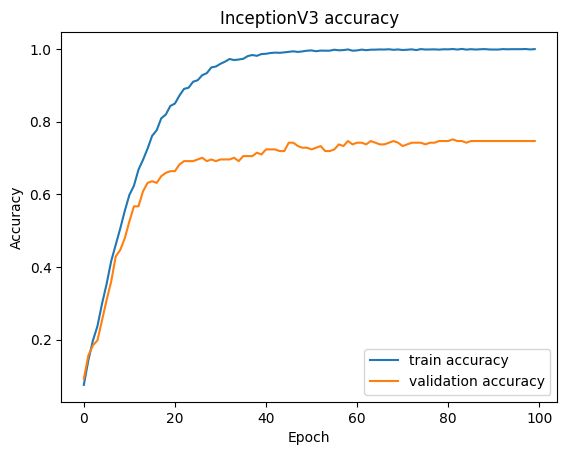

In [11]:
inceptionV3_wrapper.plot_accuracy()

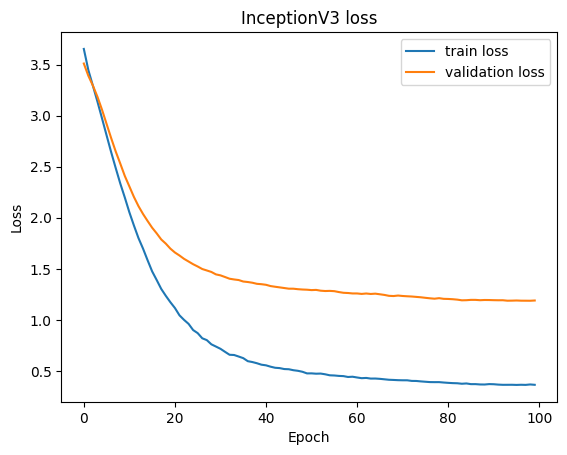

In [12]:
inceptionV3_wrapper.plot_loss()

20/20 [==============================] - 1s 31ms/step - loss: 1.1455 - accuracy: 0.7625
Loss: 1.1455
Accuracy: 0.7625
20/20 [==============================] - 1s 20ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        23
           1       0.95      0.72      0.82        25
           2       0.79      0.88      0.84        52
           3       0.86      0.84      0.85        38
           4       0.82      0.67      0.73        27
           5       0.57      0.80      0.67        35
           6       0.71      0.64      0.67        45
           7       0.75      0.90      0.82        10
           8       1.00      0.75      0.86        12
           9       1.00      0.82      0.90        11
          10       0.72      0.57      0.63        23
          11       0.73      0.92      0.81        26
          12       0.69      0.69      0.69        32
          13       0.67      0.80      0.73     

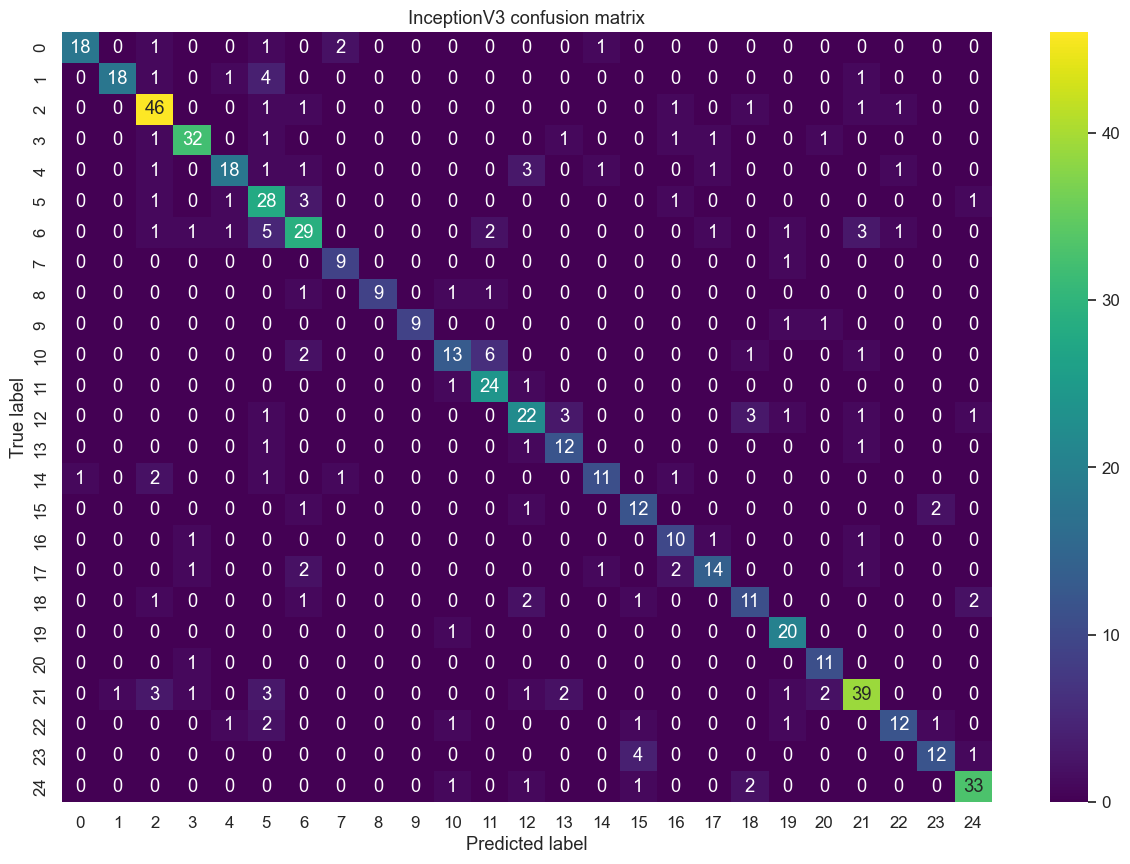

In [13]:
inceptionV3_wrapper.display_evaluation_results()